In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from iris import irisRequests
import ngl
import datetime
from numba import njit
from numba.typed import Dict
from sklearn.metrics.pairwise import haversine_distances

In [64]:
rootpath = "csv_24/"

In [65]:
regions = {}
regions['california'] = (30, 41, -125, -113)
regions['japan'] = (20, 50, 120, 150)
regions['italy'] = (35, 46, 6, 19)

In [66]:
regions #cosa rappresentano sti numeri ? I delta lat e delta long ?

{'california': (30, 41, -125, -113),
 'japan': (20, 50, 120, 150),
 'italy': (35, 46, 6, 19)}

In [67]:
station_list = ngl.ngl_process_list(ngl.ngl_24h_2w) # daily measurements, with 2 weeks delay
station_list #come accedere a un element ?

KeyboardInterrupt: 

In [ ]:
station_info = {}
for name, region in regions.items():
    station_names, station_lats, station_lons  = ngl.get_all_stations_box(station_list, *region)
    station_info[name]= (station_names, station_lats, station_lons)

#station_info['california'] has names of all stations in california, their latitudes, their longitudes

In [ ]:
station_info['california'][0][0]


'5PTS'

In [ ]:
station_info['italy'][1][4]

40.3549

In [12]:
station_data = {} 
for name, stationn_info in station_info.items(): #for all regions take the info about all the stations there
    for _, stationn_name in enumerate(stationn_info[0]): #then for all statoins in that region
        df, status = ngl.ngl_retrieve_24h(rootpath, stationn_name) #scarica nel rootpath (o loada) i dati sui terremoti in quella stazione
        print(stationn_name, status)
        station_data[stationn_name] = df
#station_data[one station] contains data of earthquakes shown in some yet to be understood manner

5PTS loaded
7OAK loaded
7ODM loaded
ACSB loaded
ACSX loaded
AERO loaded
AGMT loaded
AIAH loaded
AISD loaded
ALAM loaded
ALPP loaded
ALTH loaded
ANA1 loaded
ANTB loaded
ANTE loaded
ANTV loaded
AOA1 loaded
APEX loaded
AQUA loaded
AR27 loaded
AR53 loaded
ARGU loaded
ARM1 loaded
ARM2 loaded
ARMY loaded
ARTE loaded
ASHM loaded
AST1 loaded
AST2 loaded
ASTA loaded
AVRY loaded
AZBH loaded
AZDS loaded
AZFM loaded
AZGV loaded
AZKG loaded
AZLH loaded
AZLQ loaded
AZMP loaded
AZNE loaded
AZPK loaded
AZQZ loaded
AZRY loaded
AZU1 loaded
AZWE loaded
AZYC loaded
AZYU loaded
AZYW loaded
BADL loaded
BAK1 loaded
BAKR loaded
BALD loaded
BAMO loaded
BAR1 loaded
BATM loaded
BATT loaded
BBDM loaded
BBRY loaded
BCUT loaded
BCWR loaded
BDSP loaded
BEAT loaded
BEDE loaded
BEER loaded
BEES loaded
BEMT loaded
BEPK loaded
BERR loaded
BFLD loaded
BFLO loaded
BFLT loaded
BFSH loaded
BGIS loaded
BHIL loaded
BIGP loaded
BIGS loaded
BILL loaded
BIRD loaded
BKAP loaded
BKMS loaded
BKR1 loaded
BKR2 loaded
BLAC loaded
BLIN

In [28]:
station_data['5PTS'] #how to read this data, how many earthquakes are there? how to distinguish the same earthquake in different station measuremenets ?

,site,YYMMMDD,yyyy.yyyy,__MJD,week,d,reflon,e0,east,n0,...,sigma_e,sigma_n,sigma_u,corr_en,corr_eu,corr_nu,lat,lon,height,date
0,5PTS,10MAY01,2010.3299,55317,1581,6,-120.3,3140,0.612711,4033165,...,0.000688,0.000842,0.002864,0.014776,0.047809,-0.202390,36.429179,59.735023,56.51416,2010-05-01
1,5PTS,10MAY02,2010.3326,55318,1582,0,-120.3,3140,0.610349,4033165,...,0.000698,0.000853,0.002898,-0.001460,0.072677,-0.179667,36.429179,59.735023,56.51289,2010-05-02
2,5PTS,10MAY03,2010.3354,55319,1582,1,-120.3,3140,0.612365,4033165,...,0.000714,0.000858,0.002936,0.001436,0.059600,-0.158750,36.429179,59.735023,56.50849,2010-05-03
3,5PTS,10MAY04,2010.3381,55320,1582,2,-120.3,3140,0.613537,4033165,...,0.000695,0.000859,0.002850,-0.006081,0.054748,-0.149112,36.429179,59.735023,56.50528,2010-05-04
4,5PTS,10MAY05,2010.3409,55321,1582,3,-120.3,3140,0.612005,4033165,...,0.000685,0.000846,0.002808,0.016796,0.033864,-0.173429,36.429179,59.735023,56.50811,2010-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,5PTS,11MAY05,2011.3402,55686,1634,4,-120.3,3140,0.595514,4033165,...,0.000652,0.000824,0.002731,-0.053849,0.057743,-0.172201,36.429179,59.735023,56.55417,2011-05-05
331,5PTS,11MAY06,2011.3429,55687,1634,5,-120.3,3140,0.592347,4033165,...,0.000662,0.000830,0.002801,-0.058688,0.082758,-0.193948,36.429179,59.735023,56.55905,2011-05-06
332,5PTS,11MAY07,2011.3457,55688,1634,6,-120.3,3140,0.593752,4033165,...,0.000654,0.000824,0.002761,-0.026467,0.032168,-0.191935,36.429179,59.735023,56.56684,2011-05-07
333,5PTS,11MAY08,2011.3484,55689,1635,0,-120.3,3140,0.594539,4033165,...,0.000672,0.000848,0.002872,-0.022570,0.032551,-0.191804,36.429179,59.735023,56.56123,2011-05-08


In [30]:
start_time = datetime.datetime(2012, 1, 1, 0, 0, 0) #year, month, day, hour, minute, second
end_time =   datetime.datetime(2024, 1, 1, 0, 0, 0)
catalogs = {}
for name, region in regions.items(): #iterate over the three regions 
    download_url = irisRequests.url_events_box(start_time, end_time, region[0], region[1], region[2], region[3], minmag=3, magtype="MW") #cosa fa ?
    df = pd.read_csv(download_url, sep="|", comment="#", parse_dates=["Time"])
    df.sort_values(by="Time", inplace=True)
    df.reset_index(inplace=True, drop=True)
    catalogs[name] = df #non capisco cosa fa questa funzione

In [56]:
catalog = catalogs['japan']

In [58]:
len(catalog[catalog.Magnitude >= 5.5])

461

In [40]:
@njit(nogil=True)
def construct_map(u, idx, d, d_cutoff = 0.01):
    # u = (N_s, 3)
    # idx = (N_s)
    # d = (N_lat, N_lon, N_s_tot)
    u_map = np.zeros((d.shape[0], d.shape[1], 3))
    for i in range(0, d.shape[0]):
        for j in range(0, d.shape[1]):
            cnt = 0
            for i_n,n in enumerate(idx):
                d_ijn = d[i,j,n]
                if(d_ijn <= d_cutoff):
                    u_map[i,j,:] = u_map[i,j,:] + u[i_n, :]
                    cnt += 1
            if(cnt > 0):
                u_map[i,j,:] = u_map[i,j,:]/float(cnt)
            else:
                u_map[i,j,0] = np.nan
                u_map[i,j,1] = np.nan
                u_map[i,j,2] = np.nan
    return u_map


In [ ]:
@njit
def construct_aftershocks_map(region, coords, dlat, dlon):
    N_lat = int((region[1]-region[0])/dlat)
    N_lon = int((region[3]-region[2])/dlon)
    shocks_map = np.zeros((N_lat, N_lon))
    for coord in coords: #ccordinata staz
        i,j = int((coord[0]-region[0])/dlat), int((coord[1]-region[2])/dlon)
        shocks_map[i,j] += 1
        #if(i>0):
        #    shocks_map[i-1,j] += 1
        #if(j>0):
        #    shocks_map[i,j-1] += 1
        #if(i < N_lat-1):
        #    shocks_map[i+1,j] += 1
        #if(j < N_lon-1):
        #    shocks_map[i,j+1] += 1
    return shocks_map

california
2012-12-14 10:36:01+00:00


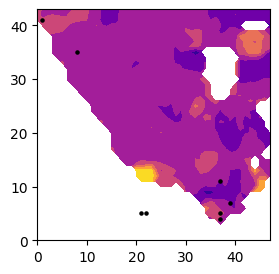

968
2014-08-24 10:20:45+00:00


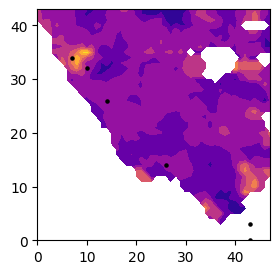

1022
2015-01-28 21:08:54+00:00


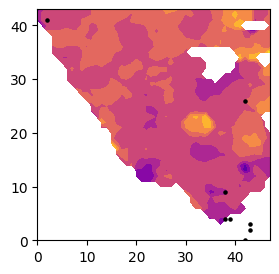

1019
2019-07-04 17:33:49+00:00


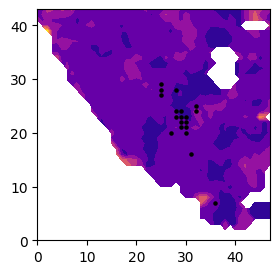

1085
2019-07-06 03:19:53+00:00


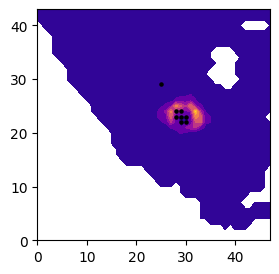

1063
2020-05-15 11:03:27+00:00


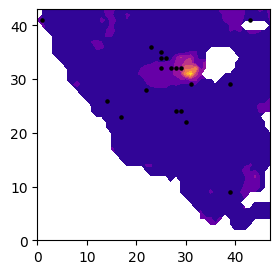

1073
2020-06-24 17:40:49+00:00


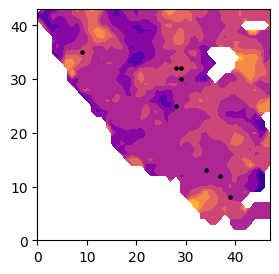

1097
2021-07-08 22:49:48+00:00


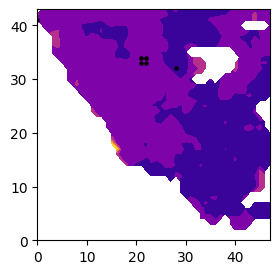

1042
2021-12-20 20:10:31+00:00


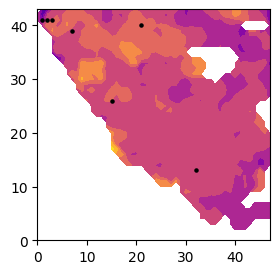

1000
2022-11-22 16:39:05+00:00


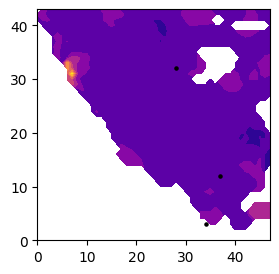

978
2022-12-20 10:34:24+00:00


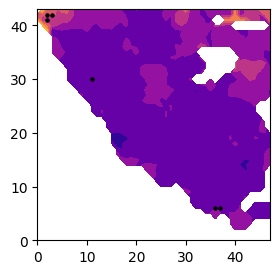

965
japan
2012-01-01 05:27:55+00:00


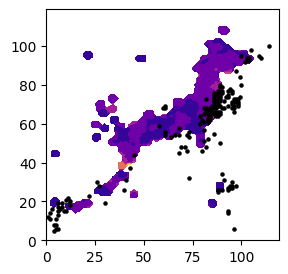

1290
2012-02-14 06:22:00+00:00


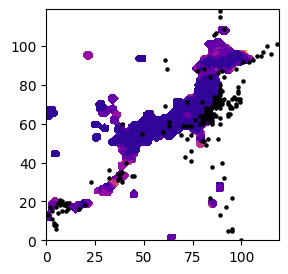

1273
2012-02-26 02:35:00+00:00


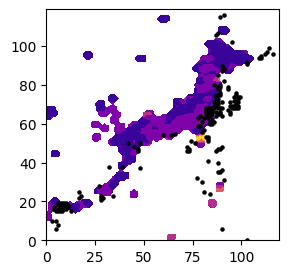

1288
2012-03-14 09:08:36+00:00


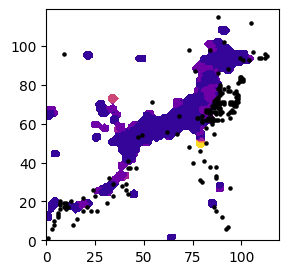

1267
2012-03-14 10:49:25+00:00


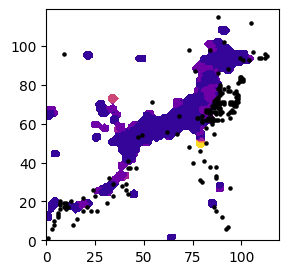

1267
2012-03-14 12:05:06+00:00


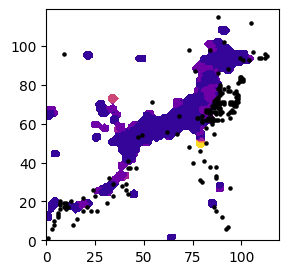

1267
2012-03-27 11:00:44+00:00


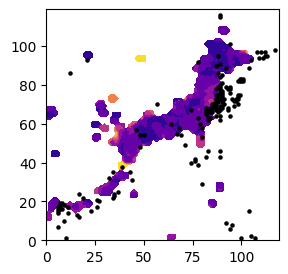

1271
2012-04-01 14:04:25+00:00


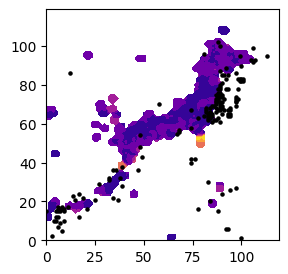

1303
2012-04-29 10:28:51+00:00


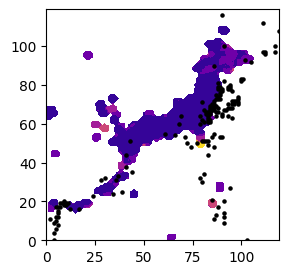

1305
2012-05-19 19:05:20+00:00


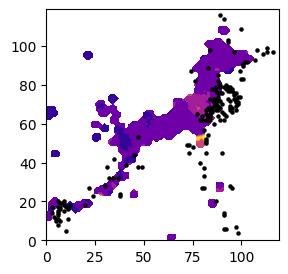

1307
2012-05-20 07:20:37+00:00


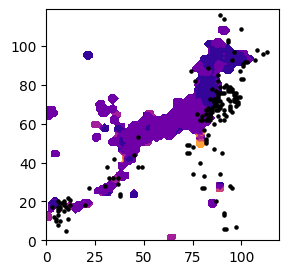

1307
2012-05-23 15:02:27+00:00


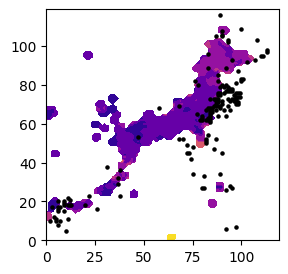

1308
2012-05-26 21:48:09+00:00


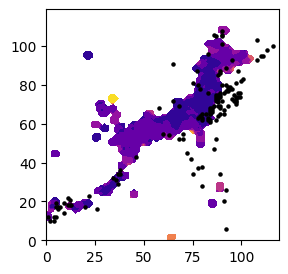

1276
2012-06-05 19:31:34+00:00


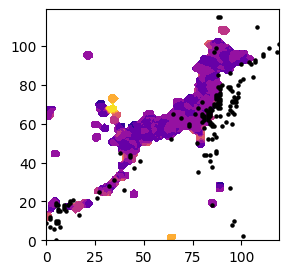

1301
2012-06-09 21:00:17+00:00


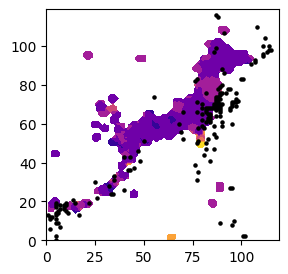

1298
2012-06-17 20:32:21+00:00


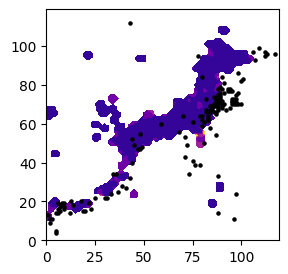

1310
2012-08-14 02:59:38+00:00


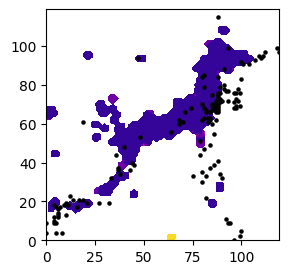

1302
2012-08-25 14:16:16+00:00


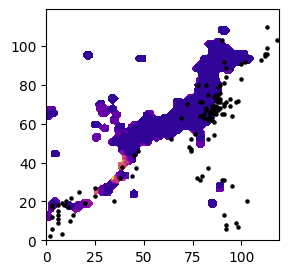

1291
2012-10-01 22:21:46+00:00


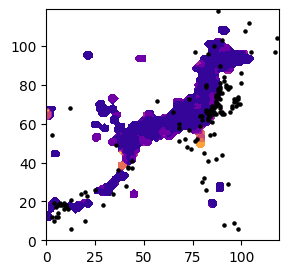

1303
2012-10-23 08:53:38+00:00


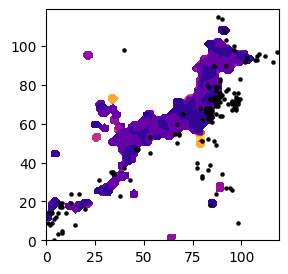

1266
2012-12-07 08:18:23+00:00


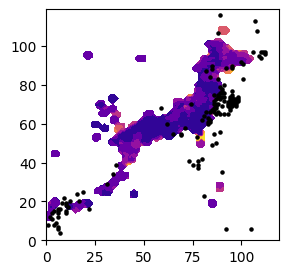

1269
2012-12-07 08:31:13+00:00


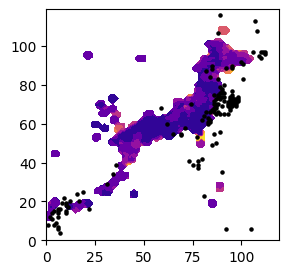

1269
2013-02-02 14:17:34+00:00


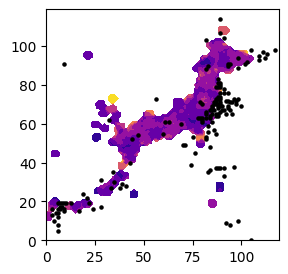

1271
2013-02-25 07:23:56+00:00


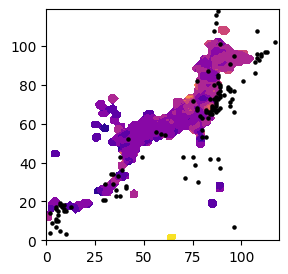

1299
2013-03-27 02:03:19+00:00


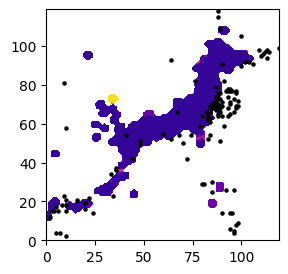

1300
2013-04-01 18:53:17+00:00


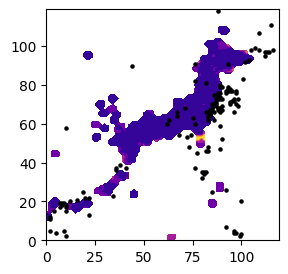

1275
2013-04-05 13:00:02+00:00


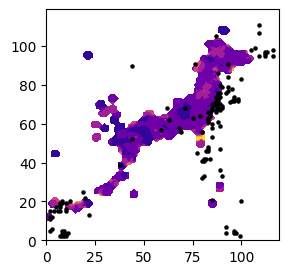

1298
2013-04-06 00:29:55+00:00


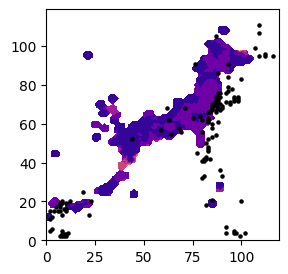

1298
2013-04-10 20:20:27+00:00


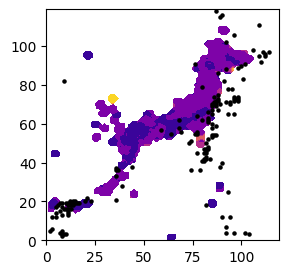

1304
2013-04-12 20:33:17+00:00


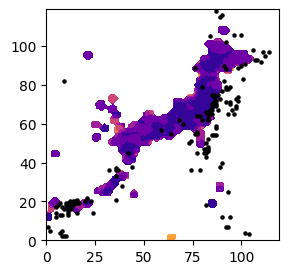

1298
2013-04-17 12:03:31+00:00


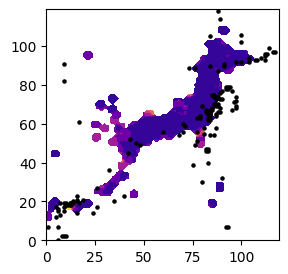

1302
2013-04-21 03:22:16+00:00


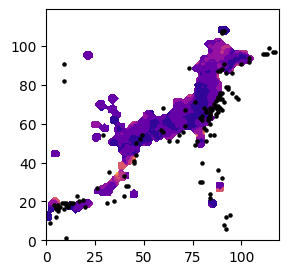

1303
2013-05-18 05:48:00+00:00


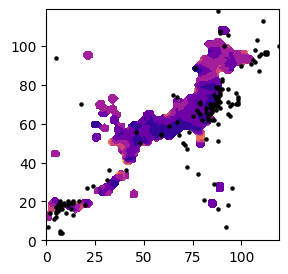

1302
2013-06-02 05:43:03+00:00


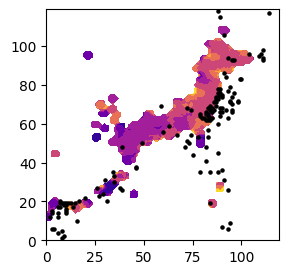

1300
2013-08-04 03:28:50+00:00


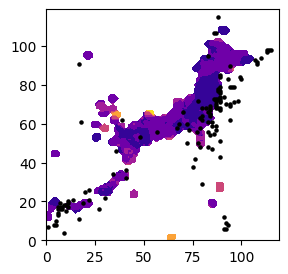

1303
2013-08-04 15:56:34+00:00


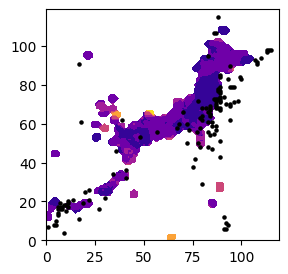

1303
2013-09-04 00:18:24+00:00


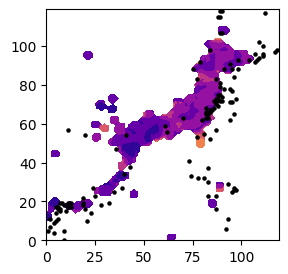

1300
2013-09-06 11:33:54+00:00


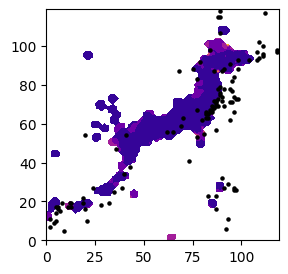

1299
2013-10-11 09:28:47+00:00


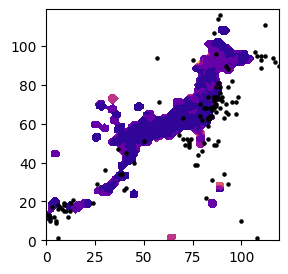

1299
2013-10-25 17:10:17+00:00


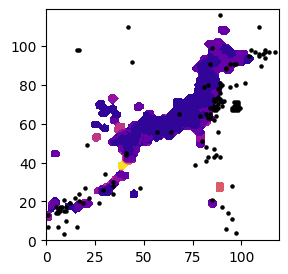

1298
2013-10-31 12:02:09+00:00


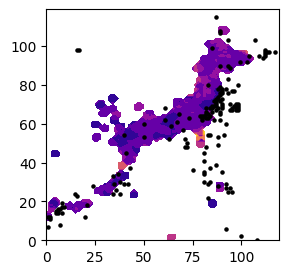

1297
2013-12-08 17:24:54+00:00


KeyboardInterrupt: 

In [60]:
maximal_time_shift = np.timedelta64(7, 'D')
minimal_time_shift = np.timedelta64(1, 'D')
dlat = 0.25
dlon = 0.25
for name, catalog in catalogs.items():
    print(name)
    # discretization of the region
    region = regions[name]
    N_lat = int((region[1]-region[0])/dlat)
    N_lon = int((region[3]-region[2])/dlon)
    grid_latlat, grid_lonlon = np.meshgrid( region[0] + np.arange(0, N_lat)*dlat, region[2] + np.arange(0, N_lon)*dlon, indexing='ij')
    grid_latlat = grid_latlat.flatten()
    grid_lonlon = grid_lonlon.flatten()
    grid = np.hstack([grid_latlat[:,None], grid_lonlon[:,None]])
    stations_coords = np.hstack([station_info[name][1][:,None], station_info[name][2][:,None]])
    grid_stations_dists = haversine_distances(np.radians(grid), np.radians(stations_coords))
    grid_stations_dists = grid_stations_dists.reshape((N_lat, N_lon, -1))
    

    # earthquakes identification
    large_shocks = catalog[catalog.Magnitude >= 5.8]
    large_shocks_days = large_shocks.Time
    large_shocks_coords =  large_shocks[['Latitude','Longitude']].values
    for day_time, coord in zip(large_shocks_days, large_shocks_coords):
        print(day_time)
        day = np.datetime64(datetime.datetime(day_time.year, day_time.month, day_time.day))
        aftershocks = catalog[(catalog.Time.values.astype('datetime64[D]') >=  day + minimal_time_shift)*(catalog.Time.values.astype('datetime64[D]') <= pd.to_datetime(day) +maximal_time_shift ) ]
        aftershocks_coords = aftershocks[['Latitude','Longitude']].values
        aftershocks_map = construct_aftershocks_map(region, aftershocks_coords, dlat, dlon)
        # daily data
        data = []
        indices = []
        for cnt, (s_name, _,__) in  enumerate(zip(*station_info[name])):
            df = station_data[s_name]
            row = df[df.date==  day]
            row_p = df[df.date==  day - np.timedelta64(1, 'D')]
            if(len(row) > 0 and len(row_p) > 0):
                u_n = row.lat.values[0]-row_p.lat.values[0]
                u_e = row.lon.values[0]-row_p.lon.values[0]
                u_v = row.height.values[0] - row_p.height.values[0]
                data.append((u_n, u_e, u_v))
                indices.append(cnt)
        if(len(indices) > 0):
            data = np.array(data)
            indices = np.array(indices)
            u_map = construct_map(data, indices, grid_stations_dists)
            #print(data)
            fig, ax = plt.subplots(ncols=1, figsize=(3,3))
            ax.contourf(np.sqrt(u_map[:,:,0]**2+u_map[:,:,1]**2), cmap='viridis')
            locs = np.argwhere(aftershocks_map>0)
            #ax[0].contour(aftershocks_map, cmap='Greys', levels=2)
            ax.scatter(locs[:,1], locs[:,0], color='black', s=5)
            plt.show()
            print(len(indices))